<a href="https://colab.research.google.com/github/DanielGreiner/Masterarbeit/blob/main/Deactivation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
#@title import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution

In [ ]:
#@title load experimental deactivation data

filepath15 = '/content/drive/MyDrive/Colab Notebooks/Masterarbeit Colabs/Experimental data - Excel sheets/resultfile_V15.csv'
V15_results = pd.read_csv(filepath15, sep='\t')

filepath44 = '/content/drive/MyDrive/Colab Notebooks/Masterarbeit Colabs/Experimental data - Excel sheets/resultfile_V44.csv'
V44_results = pd.read_csv(filepath44, sep='\t')
V44 = V44_results.copy()

filepath60 = '/content/drive/MyDrive/Colab Notebooks/Masterarbeit Colabs/Experimental data - Excel sheets/resultfile_V60.csv'
V60_results = pd.read_csv(filepath60, sep='\t')
V60 = V60_results.copy()

# Data manipulation

In [ ]:
time_cutoff = 25 # h

In [ ]:
#@title 44

V44_results['std'] = V44_results['Conversion / %'].rolling(25).std()
V44_results = V44_results[(V44_results['std'] < 0.05) & (V44_results['Conversion / %'] > 4) & (V44_results['time / h'] > time_cutoff)]
V44_results['normalised'] = V44_results['Conversion / %']/(V44_results['Temperature / °C'] + 273)/5.0019


<ipython-input-4-4067922f7a22>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  V44_results['normalised'] = V44_results['Conversion / %']/(V44_results['Temperature / °C'] + 273)/5.0019


In [ ]:
#@title 60

V60_results['std'] = V60_results['Conversion / %'].rolling(25).std()
V60_results = V60_results[(V60_results['std'] < 0.05) & (V60_results['Conversion / %'] > 4) & (V60_results['time / h'] > time_cutoff)]
V60_results['normalised'] = V60_results['Conversion / %']/(V60_results['Temperature / °C'] + 273)/5.0019


<ipython-input-5-320ab6a903c9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  V60_results['normalised'] = V60_results['Conversion / %']/(V60_results['Temperature / °C'] + 273)/5.0019


In [ ]:
#@title regression

x44 = V44_results['time / h']
y44 = V44_results['Conversion / %']
z44 = np.polyfit(x44, y44, 1)
g44 = z44[0]*V44_results['time / h'] + z44[1]
# z44 = np.polyfit(x44, y44, 2)
# g44 = z44[0]*V44_results['time / h']**2 + z44[1]*V44_results['time / h'] + z44[2]

x60 = V60_results['time / h']
y60 = V60_results['Conversion / %']
z60 = np.polyfit(x60, y60, 1)
g60 = z60[0]*V60_results['time / h'] + z60[1]
# z60 = np.polyfit(x60, y60, 2)
# g60 = z60[0]*V60_results['time / h']**2 + z60[1]*V60_results['time / h'] + z60[2]

print('44: ' + str(z44[0]) + ' ' + str(z44[1]))
print('60: ' + str(z60[0]) + ' ' + str(z60[1]))

44: -0.019445067912892623 7.62376027063542
60: -0.008323434847653088 6.548789333503451


In [ ]:
#@title normalised regression

x44_n = V44_results['time / h']
y44_n = V44_results['normalised']
z44_n = np.polyfit(x44_n, y44_n, 1)
g44_n = z44_n[0]*V44_results['time / h'] + z44_n[1]
# z44_n = np.polyfit(x44_n, y44_n, 2)
# g44_n = z44_n[0]*V44_results['time / h']**2 + z44_n[1]*V44_results['time / h'] + z44_n[2]

x60_n = V60_results['time / h']
y60_n = V60_results['normalised']
z60_n = np.polyfit(x60_n, y60_n, 1)
g60_n = z60_n[0]*V60_results['time / h'] + z60_n[1]
# z60_n = np.polyfit(x60_n, y60_n, 2)
# g60_n = z60_n[0]*V60_results['time / h']**2 + z60_n[1]*V60_results['time / h'] + z60_n[2]

print('44: ' + str(z44_n[0]) + ' ' + str(z44_n[1]* 1000) )
print('60: ' + str(z60_n[0]) + ' ' + str(z60_n[1]* 1000) )

44: -9.190372617100708e-06 3.6032456245203703
60: -3.934334394033697e-06 3.0951944619662597


In [ ]:
#@title regression means

mean_reg = np.array([z44, z60]).mean(axis = 0)
#mean_reg = z44

mean44 = mean_reg[0]*V44_results['time / h'] + mean_reg[1]
mean60 = mean_reg[0]*V60_results['time / h'] + mean_reg[1]
# mean44 = mean_reg[0]*V44_results['time / h']**2 + mean_reg[1]*V44_results['time / h'] + mean_reg[2]
# mean60 = mean_reg[0]*V60_results['time / h']**2 + mean_reg[1]*V60_results['time / h'] + mean_reg[2]

mean_reg_n = np.array([z44_n, z60_n]).mean(axis = 0)
#mean_reg_n = z44_n

v_44 = (V44_results['Temperature / °C'] + 273)*5.0019
v_60 = (V60_results['Temperature / °C'] + 273)*5.0019

mean44_n = mean_reg_n[0]*V44_results['time / h']*v_44 + mean_reg_n[1]*v_44
mean60_n = mean_reg_n[0]*V60_results['time / h']*v_60 + mean_reg_n[1]*v_60
# mean44_n = mean_reg_n[0]*v_44*V44_results['time / h']**2 + mean_reg_n[1]*v_44*V44_results['time / h'] + mean_reg_n[2]*v_44
# mean60_n = mean_reg_n[0]*v_60*V60_results['time / h']**2 + mean_reg_n[1]*v_60*V60_results['time / h'] + mean_reg_n[2]*v_60

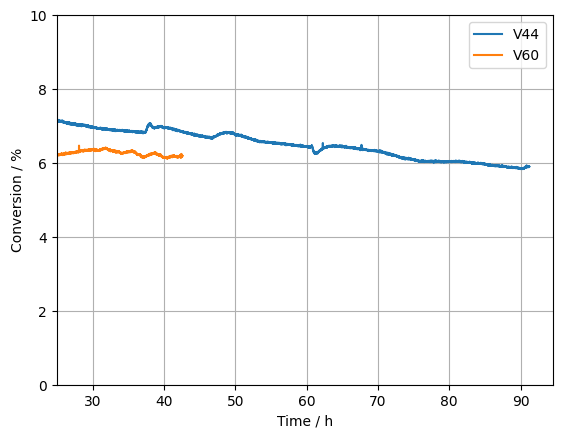

In [ ]:
plt.figure(1)

plt.plot(V44_results['time / h'], V44_results['Conversion / %'], label = 'V44')
plt.plot(V60_results['time / h'], V60_results['Conversion / %'], label = 'V60')
plt.ylim(0, 10)
plt.xlim(left = 25)
plt.grid()
plt.xlabel('Time / h')
plt.ylabel('Conversion / %')
plt.legend(loc = 'best')

# Plots

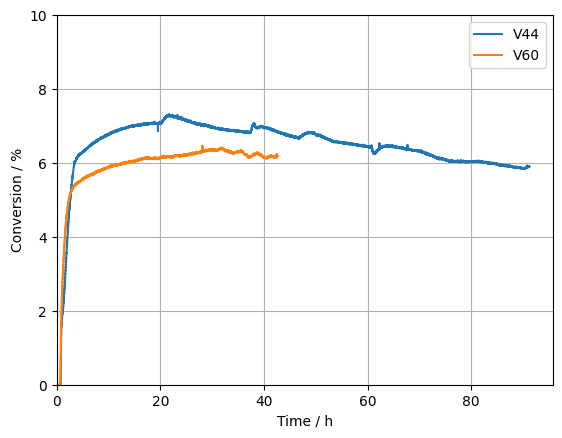

In [ ]:
#@title general conversion plotting

plt.figure(1)

#plt.plot(V15_results['time / h'], V15_results['Conversion / %'], label = '15')
plt.plot(V44['time / h'], V44['Conversion / %'], label = 'V44')
plt.plot(V60['time / h'], V60['Conversion / %'], label = 'V60')
plt.ylim(0, 10)
plt.xlim(left = 0)
plt.grid()
plt.xlabel('Time / h')
plt.ylabel('Conversion / %')
plt.legend(loc = 'best')

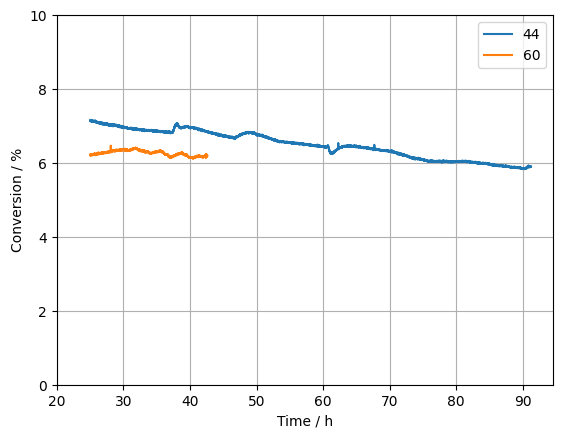

In [ ]:
#@title general conversion plotting chopped

plt.figure(1)

#plt.plot(V15_results['time / h'], V15_results['Conversion / %'], label = '15')
plt.plot(V44_results['time / h'], V44_results['Conversion / %'], label = '44')
plt.plot(V60_results['time / h'], V60_results['Conversion / %'], label = '60')
plt.ylim(0, 10)
plt.xlim(left=20)
plt.xlabel('Time / h')
plt.ylabel('Conversion / %')
plt.grid()
plt.legend(loc = 'best')

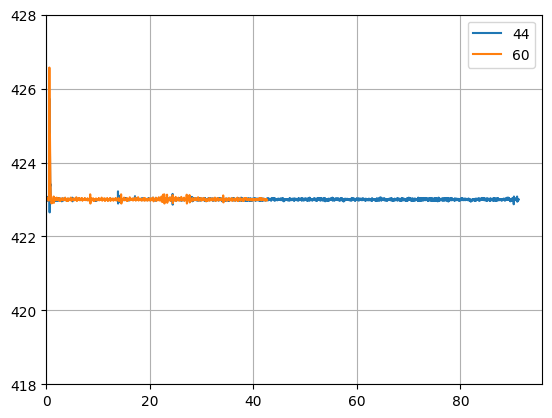

In [ ]:
#@title temp plotting

plt.figure(1)

#plt.plot(V15_results['time / h'], V15_results['Conversion / %'], label = '15')
plt.plot(V44['time / h'], V44['Temperature / °C'] + 273, label = '44')
plt.plot(V60['time / h'], V60['Temperature / °C'] + 273, label = '60')
plt.ylim(418, 428)
plt.xlim(left = 0)
plt.grid()
plt.legend(loc = 'best')


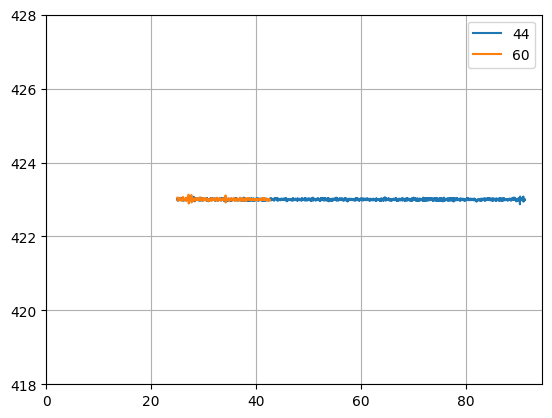

In [ ]:
#@title temp plotting chopped

plt.figure(1)

#plt.plot(V15_results['time / h'], V15_results['Conversion / %'], label = '15')
plt.plot(V44_results['time / h'], V44_results['Temperature / °C'] + 273, label = '44')
plt.plot(V60_results['time / h'], V60_results['Temperature / °C'] + 273, label = '60')
plt.ylim(418, 428)
plt.xlim(left = 0)
plt.grid()
plt.legend(loc = 'best')


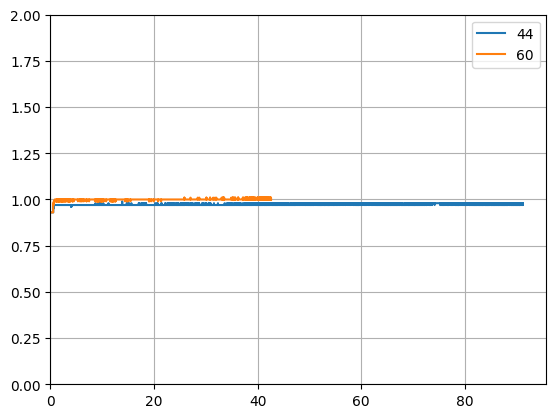

In [ ]:
#@title pressure plotting

plt.figure(1)

#plt.plot(V15_results['time / h'], V15_results['Conversion / %'], label = '15')
plt.plot(V44['time / h'], V44['pressure PIR P1.4 / bar'], label = '44')
plt.plot(V60['time / h'], V60['pressure PIR P1.4 / bar'], label = '60')
plt.ylim(0, 2)
plt.xlim(left = 0)
plt.grid()
plt.legend(loc = 'best')

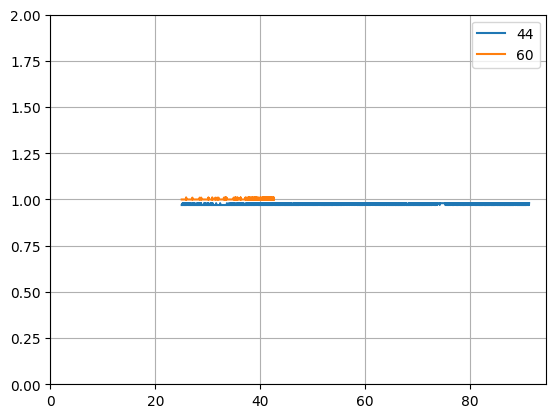

In [ ]:
#@title pressure plotting chopped

plt.figure(1)

#plt.plot(V15_results['time / h'], V15_results['Conversion / %'], label = '15')
plt.plot(V44_results['time / h'], V44_results['pressure PIR P1.4 / bar'], label = '44')
plt.plot(V60_results['time / h'], V60_results['pressure PIR P1.4 / bar'], label = '60')
plt.ylim(0, 2)
plt.xlim(left = 0)
plt.grid()
plt.legend(loc = 'best')

# Regression plots

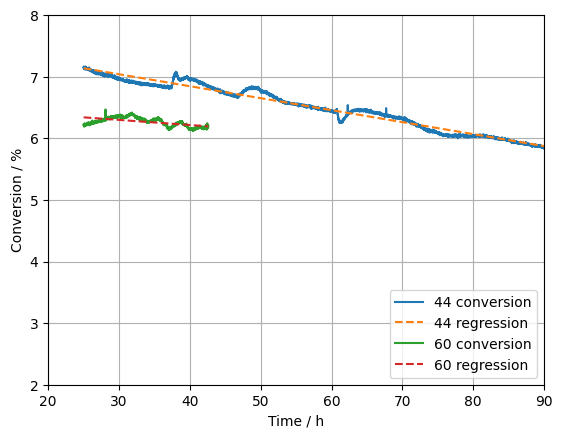

In [ ]:
#@title initial regression plot

plt.plot(V44_results['time / h'], V44_results['Conversion / %'], label='44 conversion')
plt.plot(V44_results['time / h'], g44, label='44 regression', linestyle='--')
plt.plot(V60_results['time / h'], V60_results['Conversion / %'], label='60 conversion')
plt.plot(V60_results['time / h'], g60, label='60 regression', linestyle='--')
plt.ylim(2, 8)
plt.xlim(20, 90)
plt.grid()
plt.xlabel('Time / h')
plt.ylabel('Conversion / %')
plt.legend(loc='lower right')

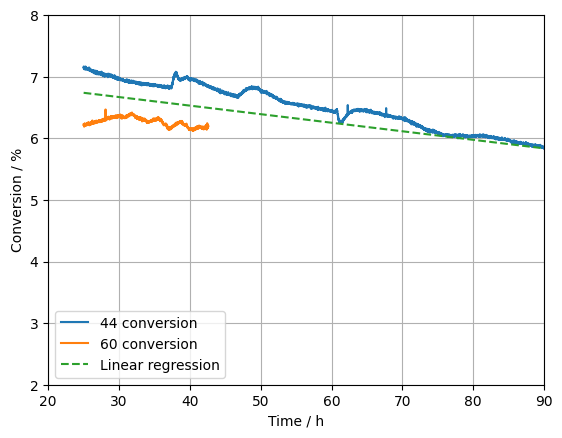

In [ ]:
#@title mean regression plot

plt.plot(V44_results['time / h'], V44_results['Conversion / %'], label='44 conversion')
plt.plot(V60_results['time / h'], V60_results['Conversion / %'], label='60 conversion')
plt.plot(V44_results['time / h'], mean44, label='Linear regression', linestyle='--')
plt.ylim(2, 8)
plt.xlim(20, 90)
plt.xlabel('Time / h')
plt.ylabel('Conversion / %')
plt.grid()
plt.legend(loc='lower left')

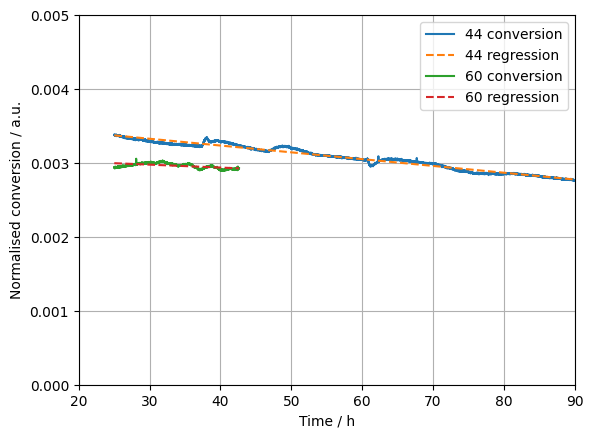

In [ ]:
#@title initial normalised regression plot

plt.plot(V44_results['time / h'], V44_results['normalised'], label='44 conversion')
plt.plot(V44_results['time / h'], g44_n, label='44 regression', linestyle='--')
plt.plot(V60_results['time / h'], V60_results['normalised'], label='60 conversion')
plt.plot(V60_results['time / h'], g60_n, label='60 regression', linestyle='--')
plt.ylim(0, 0.005)
plt.xlim(20, 90)
plt.grid()
plt.xlabel('Time / h')
plt.ylabel('Normalised conversion / a.u.')
plt.legend(loc='best')

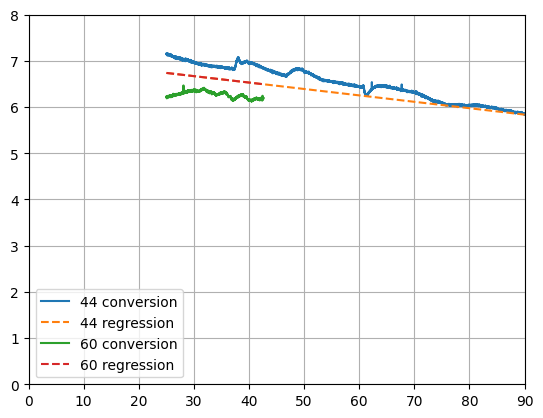

In [ ]:
#@title initial normalised mean conversion regression plot

plt.plot(V44_results['time / h'], V44_results['Conversion / %'], label='44 conversion')
plt.plot(V44_results['time / h'], mean44_n, label='44 regression', linestyle='--')
plt.plot(V60_results['time / h'], V60_results['Conversion / %'], label='60 conversion')
plt.plot(V60_results['time / h'], mean60_n, label='60 regression', linestyle='--')
plt.ylim(0, 8)
plt.xlim(0, 90)
plt.grid()
plt.legend(loc='best')

In [ ]:
#@title write deactivation values

pd.DataFrame([mean_reg_n]).to_csv('/content/drive/MyDrive/Colab Notebooks/Masterarbeit Colabs/Experimental data - Excel sheets/deactivation value.csv', index=False)